In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:

#daataset to use in thus model
from sklearn.metrics import mean_squared_error

#this function helps  in predicting  mean_squared_error between predicted and true vaolues
from sklearn.model_selection import  train_test_split
#this function takes dadatsets as features and Target and split them into trainig set and testing set


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from IPython.display import HTML
#THIS IS USED TO DESPLAY RESULTS ON THE SCREEN

# data preprocessing

In [5]:
# #load the dataset
# boston=load_boston

from sklearn.datasets import load_boston
boston1=load_boston()
print(boston1.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
# put the data into panadas Dataframe 
features=pd.DataFrame(boston1.data,columns=boston1.feature_names)
features
list(features)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [7]:
features["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [8]:
target=pd.DataFrame(boston1.target,columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
max(target["target"])

50.0

In [10]:
min(target["target"])

5.0

In [11]:
#concate features and target into a single DataFrame
#axis=1 makes  it concatente columnwise

In [12]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
#use round(decimal=2) to set the precision to 2 decimal places
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# correlation between attributes and targets

In [14]:
#correlation is statistical technique that can show whether and how strongly pairs of variables are related

In [15]:
#high or positive correlation means increase in x cause increase  in y

In [16]:
#low or negaitive correlation means increase in x cause decrease  in y

In [17]:
# whichever attrubutes has the highest absolute correlation with the target that attribute we will choose as 
# the independent variable to perform linear regression 

In [18]:
#calculate correlation betrween every column on the data

In [19]:
corr=df.corr("pearson")

In [20]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [21]:
#take the absolute value of the corrlation between each attribute and the target
#to select each column we select columns by nameto obtain the features names as a list use list feature as a dataframe that consist of only the feature and not the target column

In [22]:
corr["target"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [23]:
corrs=[abs(corr[attr]["target"])for attr in list(features)]
corrs

# absolute value=|-19|=19

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [24]:
#can be written as abs(corr["target"])

In [25]:
#make a list of pairs [(corr,feature)]
l=list(zip(corrs,features))

In [26]:
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

In [27]:
#sort the list of pairs in reverser/desending order
#with the correlation value as the  key for sorting
l.sort(key=lambda x:x[0],reverse=True)


In [28]:
l

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

In [29]:
#unzip pairs to two lists
#zip(*l)=takes a list that looks like [[a,b,c][d,e,f][g,h,i]]
# and returns[[a,d,g][b,e,h][c,f,i]]
corrs,labels=list(zip((*l)))
print(corrs,labels)

(0.7376627261740143, 0.6953599470715389, 0.507786685537561, 0.483725160028373, 0.46853593356776646, 0.4273207723732817, 0.3883046085868114, 0.3816262306397776, 0.3769545650045959, 0.3604453424505447, 0.33346081965706653, 0.24992873408590394, 0.1752601771902975) ('LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS')


In [30]:
labels

('LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS')

In [31]:
corrs

(0.7376627261740143,
 0.6953599470715389,
 0.507786685537561,
 0.483725160028373,
 0.46853593356776646,
 0.4273207723732817,
 0.3883046085868114,
 0.3816262306397776,
 0.3769545650045959,
 0.3604453424505447,
 0.33346081965706653,
 0.24992873408590394,
 0.1752601771902975)

In [32]:
list(zip((*l)))

[(0.7376627261740143,
  0.6953599470715389,
  0.507786685537561,
  0.483725160028373,
  0.46853593356776646,
  0.4273207723732817,
  0.3883046085868114,
  0.3816262306397776,
  0.3769545650045959,
  0.3604453424505447,
  0.33346081965706653,
  0.24992873408590394,
  0.1752601771902975),
 ('LSTAT',
  'RM',
  'PTRATIO',
  'INDUS',
  'TAX',
  'NOX',
  'CRIM',
  'RAD',
  'AGE',
  'ZN',
  'B',
  'DIS',
  'CHAS')]

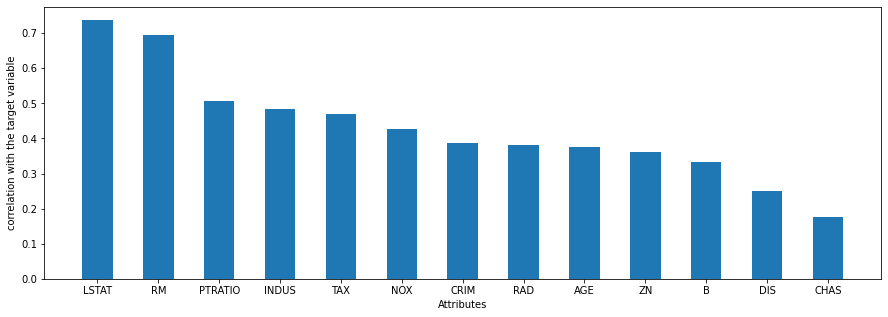

In [33]:
#plot correlation with respect to the target variable as a bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel("Attributes")
plt.ylabel("correlation with the target variable")
plt.xticks(index,labels)
plt.show()

# Normalise data

In [34]:
X=df["LSTAT"].values
Y=df["target"].values
X

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

In [35]:
Y[:5]
X

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

In [36]:
#MinMaxScaler== divide the value between 0 to 1

In [37]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X

array([[0.08967991],
       [0.2044702 ],
       [0.06346578],
       [0.03338852],
       [0.09933775],
       [0.09602649],
       [0.29525386],
       [0.48068433],
       [0.7781457 ],
       [0.424117  ],
       [0.51655629],
       [0.31843267],
       [0.38576159],
       [0.18018764],
       [0.23537528],
       [0.18598234],
       [0.13383002],
       [0.35706402],
       [0.27483444],
       [0.26352097],
       [0.53228477],
       [0.33388521],
       [0.46881898],
       [0.50082781],
       [0.40204194],
       [0.40783664],
       [0.36092715],
       [0.42908389],
       [0.30546358],
       [0.28283664],
       [0.575883  ],
       [0.31208609],
       [0.71688742],
       [0.45860927],
       [0.51352097],
       [0.21937086],
       [0.26710817],
       [0.19426049],
       [0.23178808],
       [0.07146799],
       [0.00689845],
       [0.08581678],
       [0.11258278],
       [0.15756071],
       [0.21578366],
       [0.23399558],
       [0.34271523],
       [0.471

In [38]:
X=X[:,-1]#all rows

In [39]:
X

array([0.08967991, 0.2044702 , 0.06346578, 0.03338852, 0.09933775,
       0.09602649, 0.29525386, 0.48068433, 0.7781457 , 0.424117  ,
       0.51655629, 0.31843267, 0.38576159, 0.18018764, 0.23537528,
       0.18598234, 0.13383002, 0.35706402, 0.27483444, 0.26352097,
       0.53228477, 0.33388521, 0.46881898, 0.50082781, 0.40204194,
       0.40783664, 0.36092715, 0.42908389, 0.30546358, 0.28283664,
       0.575883  , 0.31208609, 0.71688742, 0.45860927, 0.51352097,
       0.21937086, 0.26710817, 0.19426049, 0.23178808, 0.07146799,
       0.00689845, 0.08581678, 0.11258278, 0.15756071, 0.21578366,
       0.23399558, 0.34271523, 0.47102649, 0.80242826, 0.39928256,
       0.32339956, 0.21247241, 0.09795806, 0.18487859, 0.36065121,
       0.08498896, 0.11147903, 0.06125828, 0.14155629, 0.2066777 ,
       0.31512141, 0.35071744, 0.13796909, 0.21440397, 0.17439294,
       0.08112583, 0.2348234 , 0.17577263, 0.31346578, 0.19481236,
       0.13769316, 0.22488962, 0.10458057, 0.16032009, 0.13934

In [40]:
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [41]:
Y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])